In [5]:
from typing import Union, List
import networkx as nx
import pandas as pd
import math
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from abc import ABC, abstractmethod
import numpy as np

In [6]:
def V(num: int) -> int:
    return 4*num+1

def S(num: int) -> int:
    return 2*num+1

def fG(num: int) -> int:
    return 2*num-1

def getType(num):
    if (num+1) % 3 == 0:
        return "A"
    elif (num % 3) == 0:
        return "B"
    elif (num - 1) % 3 == 0:
        return "C"

def toBinVec(x, l=0) -> list:
    result = [int(i) for i in bin(x)[2:]]
    missing_zeros = l-len(result)
    if (missing_zeros > 0):
        for i in range(missing_zeros):
            result.insert(0, 0)
    return result

def ruleTwo(num):
    result = (num-1)/2
    r = 0
    k = 0
    while result % 2 != 0:
        result = (result-1)/2
        k+=1
    r = result/2
    if ((k) % 2 == 0 and r % 2 == 0) or ((k) % 2 != 0 and r % 2 != 0):
        return True
    else:
        return False


In [7]:
class Tree:
    def __init__(self, num_rows):
        self.num_rows = num_rows
        self.rows = []
        self.markedRows = []
        self.generate()
 
    def generate(self):
        for i in range(self.num_rows):
            row = []
            for j in range(2**i, 2**(i+1)):
                if j % 2 == 1:
                    node = Node(j)
                    row.append(node)
            self.rows.append(row)
   
    def getNode(self, label):
        row = Node.getRow(label)
        if row < self.num_rows:
            return self.rows[row][(label-(2**row+1))//2]
        return None

    def getGeom(self) -> Union[List[int], List[int], List[str]]:
        arr_x = []
        arr_y = []
        arr_colors = []
        for i, row in enumerate(self.rows):
            for j, node in enumerate(row):
                row_half = len(row) / 2
                x = 0.5 if (row_half < 1) else j-row_half+1
                arr_x.append(x)
                arr_y.append(i)
                color = "black"
                if node.state == NodeState.ORANGE:
                    color = "orange"
                elif node.state == NodeState.BLUE:
                    color = "blue"
                arr_colors.append(color)
                if node.state == NodeState.BLACK:
                    rowIsMarked = False
        return arr_x, arr_y, arr_colors
   
    def mark(self, label):
        node = self.getNode(label)
        if node is not None and node.state != NodeState.BLUE:
            #print("{0}".format(label))
            node.state = NodeState.ORANGE

    def checkTreeFrozen(self) -> bool:
        for row in self.rows:
            for node in row:
                if node.state == NodeState.ORANGE:
                    return False
                
        return True

    def checkRowMarked(self) -> int:
        #print(self.markedRows)
        for i, row in enumerate(self.rows):
            rowIsMarked = True
            for node in row:
                if node.state == NodeState.BLACK:
                    rowIsMarked = False
                    break
            if rowIsMarked == True:
                if i not in self.markedRows:
                    self.markedRows.append(i)
                    return i            
        return -1

    def debugTree(self):
        for row in self.rows:
            for node in row:
                print("{0}-{1}".format(node.label, node.state), end =" ")
            print('\n')

class NodeState():    
    BLACK = 1
    ORANGE = 2
    BLUE = 3


class Node:
    def __init__(self, label):
        self.tree = None
        self.row = Node.getRow(label)
        self.state = NodeState.BLACK
        self.label = label
   
    @staticmethod
    def getRow(label: int) -> int:
        return int(math.log(label,2))
 
    @staticmethod
    def getType(label):
        if (label + 1) % 3 == 0:
            return 1
        elif label % 3 == 0:
            return 2
        elif (label - 1) % 3 == 0:
            return 3
        return -1

def isIncluded(numberArr, number):

    if len(numberArr) > 0:
        numberArr.sort()
        
        left = int(0)
        right = int(len(numberArr)-1)
        i = int(0)
        
        
        while left <= right:
            
            i = int((left + right)/2)
            if numberArr[i] == number:
                return True
            
            elif numberArr[i] < number:
                left = i+1
            else:
                right = i-1
        
            
        if numberArr[i] == number:
            return True
        else:
            return False
    else:
        return False

def setStartArr(n):
    for i in range(0,n):
        if i == 0:
            arrInfo.append(0)
            saveArrInfo.append(0)
            rowStartLabel.append(1)
        elif i == 1:
            arrInfo.append(1)
            saveArrInfo.append(1)
            rowStartLabel.append(3)
        elif i == 2:
            arrInfo.append(2)
            saveArrInfo.append(2)
            rowStartLabel.append(5)
        else:
            arrInfo.append(2**(i-1))
            saveArrInfo.append(2**(i-1))
            rowStartLabel.append(2**i + 1)
        
        blue_expense.append(0)

    return arrInfo, saveArrInfo, rowStartLabel, blue_expense

def getCounter(rowStartLabel, value):
    
    counter = 0
    
    for start in rowStartLabel:
        if counter != len(rowStartLabel):
            if value < rowStartLabel[counter]:
                break
            else:
                counter = counter + 1
        elif counter == len(rowStartLabel):
            break

    return counter

average: 351.6
start: 3907
offspring below 15631:
19338
expense
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 9, 11]

proportion
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001953125, 0.00439453125, 0.002685546875]



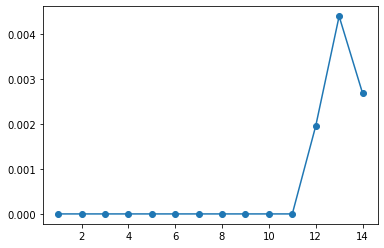

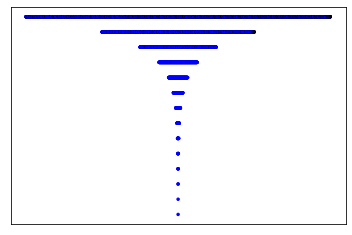

In [8]:
# dotsize=24 (n<=6)
#dotsize= 6 #(n=9)
dotsize= 1 #(n>9)
n = 14

tree = Tree(n)

proved = []
start = 19

range_offspring = 0



#####################################################################
# count average offspring of several numbers
count_num=1
while start <= 3900:
#####################################################################
    first_node = tree.getNode(start)
    first_node.state = NodeState.BLUE
    tree.mark(start)
    proved.append(start)
    included = []
    included.append(start)
    expenses = []
    blue_expense = []
    rows = []
    arrInfo = []
    rowStartLabel = []
    saveArrInfo = []
    arrInfo, saveArrInfo, rowStartLabel, blue_expense = setStartArr(n)

    for i in range(0,n):
        rows.append(i+1)

    counter = getCounter(rowStartLabel, start)
    arrInfo[counter-1] -= 1

    #print(2**(n+1))

    if ruleTwo(start) == False:
        
        if int((start-1)/4)%2 != 0:
            proved.append(int((start-1)/4))
            included.append(int((start-1)/4))
            counter = getCounter(rowStartLabel, (int((start-1)/4)))
            arrInfo[counter-1] -= 1

            node = tree.getNode((int((start-1)/4)))
            node.state = NodeState.ORANGE

        if int((start-1)/2)%2 != 0:
            proved.append(int((start-1)/2))
            included.append(int((start-1)/2))
            counter = getCounter(rowStartLabel, (int((start-1)/2)))
            arrInfo[counter-1] -= 1

            node = tree.getNode((int((start-1)/2)))
            node.state = NodeState.ORANGE

    ##Syr(x) for total expense

    syr_start = start
    for i in range(0,5):
        
        if int((3*syr_start+1)/2) % 2 != 0:
            
            syr_start = (int((3*syr_start+1)/2))
            
            if isIncluded(included, syr_start) == False:
                proved.append(syr_start)
                included.append(syr_start)
                #print(syr_start)
                counter = getCounter(rowStartLabel, syr_start)
                arrInfo[counter-1] -= 1

                node = tree.getNode(syr_start)
                node.state = NodeState.ORANGE

                # if syr_start < V(start)+2:
                #     range_offspring += 1 

        else:
            syr_var = int((3*syr_start+1)/2)
            while syr_var % 2 == 0:
                syr_var = int(syr_var / 2)

            if isIncluded(included, syr_var) == False:
                #print(syr_var)
                proved.append(syr_var)
                included.append(syr_var)
                
                node = tree.getNode(syr_var)
                node.state = NodeState.ORANGE
            
                # if syr_var < V(start)+2:
                #     range_offspring += 1 

            syr_start = syr_var   



    while len(proved)>0:
        for i in proved:

            if i < V(start)+2:
                #print(i)
                range_offspring += 1 

            #i = proved[0]
            #print(i)
            if i < 2**(n+2):
                
                node = tree.getNode(i)
                #tree.mark(i)

                if Node.getType(i) == 2:
                    # RULE 1 : if x is orange V(x) becomes orange 
                    if isIncluded(included, V(i)) == False and V(i) < 2**(n):
                        tree.mark(V(i))
                        proved.append(V(i))
                        included.append(V(i))
                        counter = getCounter(rowStartLabel, V(i))
                        arrInfo[counter-1] -= 1 

                    # RULE 2 : if x is orange S(x) becomes orange
                    if isIncluded(included, S(i)) == False and S(i) < 2**(n):    
                        r2 = ruleTwo(i)
                        if r2:
                            tree.mark(S(i))
                            proved.append(S(i))
                            included.append(S(i))
                            counter = getCounter(rowStartLabel, S(i))
                            arrInfo[counter-1] -= 1
                    
                    node.state = NodeState.BLUE
                    proved.remove(i)

                    counter = getCounter(rowStartLabel, i)
                    blue_expense[counter-1] += 1

                    break

                if Node.getType(i) == 3:
                    # RULE 1 : if x is orange V(x) becomes orange 
                    if isIncluded(included, V(i)) == False and V(i) < 2**(n):   
                        tree.mark(V(i)) 
                        proved.append(V(i))  
                        included.append(V(i))   
                        counter = getCounter(rowStartLabel, V(i))
                        arrInfo[counter-1] -= 1      
                    # RULE 2 : if x is orange S(x) becomes orange
                    if isIncluded(included, S(i)) == False and S(i) < 2**(n):       
                        r2 = ruleTwo(i)
                        if r2:
                            tree.mark(S(i))
                            proved.append(S(i))
                            included.append(S(i))
                            counter = getCounter(rowStartLabel, S(i))
                            arrInfo[counter-1] -= 1
                    # RULE 3 : if x is orange and of type C then ((4x-1)/3) becomes orange         
                    if isIncluded(included, int((4*i-1)/3)) == False and int((4*i-1)/3) < 2**(n):       
                        tree.mark(int((4*i-1)/3))
                        proved.append(int((4*i-1)/3))
                        included.append(int((4*i-1)/3))
                        counter = getCounter(rowStartLabel, int((4*i-1)/3))
                        arrInfo[counter-1] -= 1
                    node.state = NodeState.BLUE
                    proved.remove(i)

                    counter = getCounter(rowStartLabel, i)
                    blue_expense[counter-1] += 1

                    break
                
                if Node.getType(i) == 1:
                    # RULE 1 : if x is orange V(x) becomes orange 
                    if isIncluded(included, V(i)) == False and V(i) < 2**(n):
                        tree.mark(V(i))
                        proved.append(V(i))
                        included.append(V(i))
                        counter = getCounter(rowStartLabel, V(i))
                        arrInfo[counter-1] -= 1
                    # RULE 2 : if x is orange S(x) becomes orange
                    if isIncluded(included, S(i)) == False and S(i) < 2**(n):       
                        r2 = ruleTwo(i)
                        if r2:
                            tree.mark(S(i))
                            proved.append(S(i))
                            included.append(S(i))
                            counter = getCounter(rowStartLabel, S(i))
                            arrInfo[counter-1] -= 1
                    # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange
                    if isIncluded(included, int(fG(i)/3)) == False and int(fG(i)/3) < 2**(n): 
                        tree.mark(int(fG(i)/3))
                        proved.append(int(fG(i)/3))
                        included.append(int(fG(i)/3))
                        counter = getCounter(rowStartLabel, int(fG(i)/3))
                        arrInfo[counter-1] -= 1

                    node.state = NodeState.BLUE
                    proved.remove(i)

                    counter = getCounter(rowStartLabel, i)
                    blue_expense[counter-1] += 1

                    break

# calc average offspring of several numbers                
    start += 72 
    count_num += 1

av = range_offspring/count_num
#print("numbers between 65 and 1865: " + str(count_num))
print("average: "+str(av))


###############################################################
#print(arrInfo)
proportion = []
for i in range(0, len(arrInfo)):

    expense = saveArrInfo[i]-arrInfo[i]
    expenses.append(expense)
    
    if saveArrInfo[i] != 0 and expense != 0:
        proportion.append(expense/saveArrInfo[i])
    else:
        proportion.append(0)
   


print('start: ' + str(start))
# outcomment syr(x) part
print("offspring below " + str(V(start)+2) + ":")
print(range_offspring)

print("expense")
print(expenses)
# print("blue_expense")
# print(blue_expense)
print()
print("proportion")
print(proportion)
print()

plt.plot(rows, proportion, marker = 'o', linestyle = 'solid')
plt.show()


print()

x, y, colors = tree.getGeom()
plt.scatter(x, y, s=dotsize, c=colors)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)     

plt.show()

#############################################################